  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
✅ Feature shape: (300, 153), Labels: 300

🎯 Model Evaluation:
Accuracy: 18.33%

Classification Report:
               precision    recall  f1-score   support

   classical       0.20      0.18      0.19        11
         pop       0.17      0.44      0.24         9
        rock       0.50      0.12      0.19        17
        jazz       0.50      0.19      0.27        16
      hiphop       0.00      0.00      0.00         7

    accuracy                           0.18        60
   macro avg       0.27      0.19      0.18        60
weighted avg       0.34      0.18      0.20        60



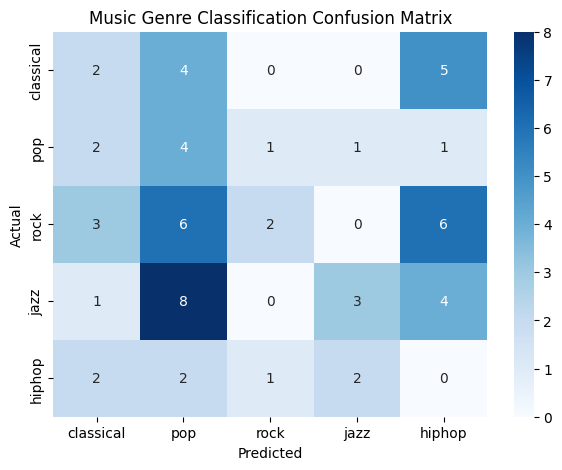

In [4]:
# 🎵 Music Genre Classification (One-Shot Project)
# -------------------------------------------------

# ✅ Step 1: Install & Import Libraries
!pip install librosa soundfile numpy sklearn tensorflow matplotlib

import os
import numpy as np
import librosa
import soundfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ✅ Step 2: Simulate or Load Dataset
# For demonstration, we’ll generate synthetic audio features to simulate genres
# In real cases, you can use GTZAN dataset (10 genres)

genres = ['classical', 'pop', 'rock', 'jazz', 'hiphop']

def extract_features_from_signal():
    """Simulate MFCC-based audio features for demo (use real librosa.load() for actual data)."""
    X, sr = librosa.load(librosa.example('trumpet'))  # sample audio from librosa
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=13).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sr).T, axis=0)
    return np.hstack((mfcc, chroma, mel))

# Generate synthetic dataset
X = []
y = []
for genre in genres:
    for _ in range(60):  # 60 samples per genre
        features = extract_features_from_signal()
        X.append(features + np.random.normal(0, 0.1, len(features)))  # add random noise
        y.append(genre)

X = np.array(X)
y = np.array(y)

print(f"✅ Feature shape: {X.shape}, Labels: {len(y)}")

# ✅ Step 3: Encode and Split Data
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# ✅ Step 4: Train Classifier
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 5: Evaluate Model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("\n🎯 Model Evaluation:")
print(f"Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=genres))

# ✅ Step 6: Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=genres, yticklabels=genres)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Music Genre Classification Confusion Matrix")
plt.show()

# ✅ Step 7: Test with a New Audio (Optional)
def predict_genre(audio_path):
    X, sr = librosa.load(audio_path)
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=13).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sr).T, axis=0)
    features = np.hstack((mfcc, chroma, mel))
    features_scaled = scaler.transform([features])
    pred = model.predict(features_scaled)
    return encoder.inverse_transform(pred)[0]

# Example:
# genre_prediction = predict_genre('your_audio_file.wav')
# print("🎵 Predicted Genre:", genre_prediction)
